### This Notebook is concerned with the final capstone project of IBM professional Data Science Course by Coursera 

In [10]:
import pandas as pd
import numpy as np
import requests 

In [11]:
print(' Hello Capstone Project Course!')

 Hello Capstone Project Course!


In [12]:
import pandas as pd
url = pd.read_html( 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' )

In [13]:
## pandas read all tables in html format and store it as a serie of tabels 
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header=0)

In [14]:
## the needed table is the first 
df= dfs[0]

In [15]:
## we drop rows where the value of Borough is not assigned 
df = df.drop(df[df["Borough"] == 'Not assigned'].index)


In [16]:
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [17]:
## if a postcode have more than one neighbourhoud we concatiante those neighbourhouds to reduce the number of rows 

df1=df.groupby("Postcode").agg(lambda x:','.join(set(x)))
df1

,Borough,Neighbourhood
Postcode,,
M1B,Scarborough,"Malvern,Rouge"
M1C,Scarborough,"Port Union,Rouge Hill,Highland Creek"
M1E,Scarborough,"Morningside,West Hill,Guildwood"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae
...,...,...
M9N,York,Weston
M9P,Etobicoke,Westmount
M9R,Etobicoke,"St. Phillips,Richview Gardens,Martin Grove Gar..."


In [18]:
## if a nighbourhoud have a not assigned value we attribute to it the value of Borough
df1.loc[df1['Neighbourhood']=="Not assigned",'Neighbourhood']=df1.loc[df1['Neighbourhood']=="Not assigned",'Borough']



In [19]:
df1.shape

(103, 2)

In [20]:
df2= pd.read_csv('Geospatial_Coordinates.csv')

In [21]:
df2.shape

(103, 3)

In [22]:
df2.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(df2, df1, on='Postcode')
df

,Postcode,Latitude,Longitude,Borough,Neighbourhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern,Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Port Union,Rouge Hill,Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Morningside,West Hill,Guildwood"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae
...,...,...,...,...,...
98,M9N,43.706876,-79.518188,York,Weston
99,M9P,43.696319,-79.532242,Etobicoke,Westmount
100,M9R,43.688905,-79.554724,Etobicoke,"St. Phillips,Richview Gardens,Martin Grove Gar..."
101,M9V,43.739416,-79.588437,Etobicoke,"South Steeles,Humbergate,Thistletown,Albion Ga..."


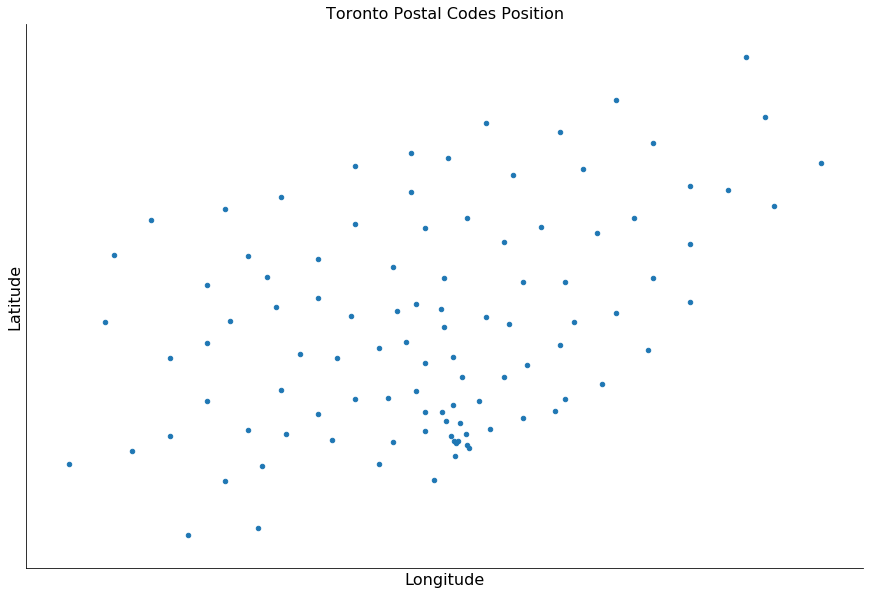

In [23]:
import matplotlib.pyplot as plt

X = df[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()